In [1]:
print ("Om Vakraduntaya Namah")

Om Vakraduntaya Namah


# Customer Churn Modelling

### Workflow:

Data Wrangling:  The process of transforming raw data to a clean organized format ready for use.

 - Inspection of data
 - Isolate/Discard model features
 - Check feature data types
 - Convert any strings to integers for modelling
 - Data imputation
 - Outliers and distributions
 
 
Exploratory Data Analysis:

 - Correlation Matrix
 - Heatmap
 - Feature importance by Random Forest classifier (mean difference in impurity analysis)
 - Data discretitisation (to break up a  numerical feature into discrete bins) and visualisation with Seaborn
 - Customer segmentation and intervention strategies
 
Predictive Modelling:
 
 - Logistic Regression
 - Decision Tree
 - Random Forest
 - Gradient Boosting
 - SVM
 - KNN 
 - Neural Network

# Introduction

In this notebook, customer churn will be explored, visualised and modelled. This type of analysis is valuable in a number of ways. Firstly, due to rapid developments in technology, unique products and services are becoming commoditised faster than ever before, thus, markets are reaching new levels of efficiency and facing higher levels of competition. Furthermore, as technology continues to develop, the tools employed in enacting the 4 p’s of marketing (product, promotion, placement, and price) are increasingly becoming both digitised and democratised across a large number of consumers. This digitisation and democratisation is shifting the balance of power from firms to consumers. As a result, firms are losing control over the marketing mix and consumers are taking on more active and expansive roles across various marketing activities. 

In parallel to these developments, firms have acquired more data on their customers than at any other point in history, giving them the capacity to understand their customers with a level of granularity that was previously not possible. 

Finally, from a growth perspective, focusing on customer retention rather than just customer accquisition offers another lever for companies to pull when attempting to optimise their growth targets.

For the preceding reasons, moving beyond traditional product centric approaches to marketing, and adopting more customer centric strategies has the capacity to give companies the necessary edge in todays hyper competitive market place. This analysis will explore this idea further.

The data files state that the data is "artificial and based on claims similar to the real world".

# Import all the necessary packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import neural_network
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix, log_loss


C:\Users\home\Anaconda369\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\home\Anaconda369\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\home\Anaconda369\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning

In [2]:
df = pd.read_csv("D:/dat1/pychurn.csv",sep=',')
df.head(2)   # head(df,2)

,Unnamed: 0,account.length,international.plan,voice.mail.plan,number.vmail.messages,total.day.minutes,total.day.calls,total.day.charge,total.eve.minutes,total.eve.calls,total.eve.charge,total.night.minutes,total.night.calls,total.night.charge,total.intl.minutes,total.intl.calls,total.intl.charge,number.customer.service.calls,churn
0,1,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,2,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.


In [4]:
df.size
df.shape

(1840, 19)

In [3]:
df.describe()

,Unnamed: 0,account.length,number.vmail.messages,total.day.minutes,total.day.calls,total.day.charge,total.eve.minutes,total.eve.calls,total.eve.charge,total.night.minutes,total.night.calls,total.night.charge,total.intl.minutes,total.intl.calls,total.intl.charge,number.customer.service.calls
count,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000
mean,920.500000,99.652717,8.540761,180.179402,100.269565,30.631027,200.407065,100.209239,17.034793,200.219022,100.450543,9.009918,10.208043,4.499457,2.756707,1.542935
std,531.306566,39.937792,14.007901,54.049201,19.999379,9.188340,51.226070,19.827786,4.354181,51.376336,19.565585,2.311955,2.797393,2.501549,0.755324,1.304739
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.200000,12.000000,2.650000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,460.750000,73.000000,0.000000,145.000000,87.000000,24.650000,165.900000,87.000000,14.100000,166.975000,87.000000,7.517500,8.400000,3.000000,2.270000,1.000000
50%,920.500000,98.500000,0.000000,180.800000,100.500000,30.735000,202.250000,101.000000,17.195000,200.650000,101.000000,9.030000,10.200000,4.000000,2.750000,1.000000
75%,1380.250000,127.000000,21.250000,216.800000,113.000000,36.860000,234.550000,114.000000,19.935000,236.425000,114.000000,10.640000,12.000000,6.000000,3.240000,2.000000
max,1840.000000,243.000000,51.000000,350.800000,165.000000,59.640000,351.600000,168.000000,29.890000,381.900000,175.000000,17.190000,20.000000,19.000000,5.400000,9.000000


In [6]:
df.dtypes

Unnamed: 0                         int64
account.length                     int64
international.plan                object
voice.mail.plan                   object
number.vmail.messages              int64
total.day.minutes                float64
total.day.calls                    int64
total.day.charge                 float64
total.eve.minutes                float64
total.eve.calls                    int64
total.eve.charge                 float64
total.night.minutes              float64
total.night.calls                  int64
total.night.charge               float64
total.intl.minutes               float64
total.intl.calls                   int64
total.intl.charge                float64
number.customer.service.calls      int64
churn                             object
dtype: object

In [4]:
df['churn'].value_counts()

 False.    1603
 True.      237
Name: churn, dtype: int64

In [5]:
237/float(1603) * 100

14.784778540237056

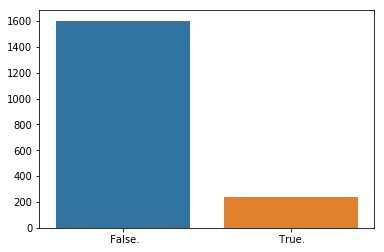

In [6]:
s = df['churn'].value_counts()
sns.barplot(s.index, s.values)

# Data Preprocessing

## 1. Converting Strings to Numerical Values

In [4]:
df_2 = df.select_dtypes(include = [object])
df_2.head(2)

,international.plan,voice.mail.plan,churn
0,no,yes,False.
1,no,yes,False.


In [9]:
intl_plan=df.groupby("international.plan").size()
print(intl_plan)
VMail_Plan=df.groupby('voice.mail.plan').size()
print(VMail_Plan)

international.plan
 no     1660
 yes     180
dtype: int64
voice.mail.plan
 no     1310
 yes     530
dtype: int64


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_3 = df_2.apply(le.fit_transform)
df_3.head(5)

,international.plan,voice.mail.plan,churn
0,0,1,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0


In [14]:
intl_plan=df.groupby("international.plan").size()
print(intl_plan)
VMail_Plan=df.groupby('voice.mail.plan').size()
print(VMail_Plan)

international.plan
 no     1660
 yes     180
dtype: int64
voice.mail.plan
 no     1310
 yes     530
dtype: int64


In [7]:
cols = df_3.columns
for x in cols:
    df[x] = df_3[x]
df.head(5)  

,Unnamed: 0,account.length,international.plan,voice.mail.plan,number.vmail.messages,total.day.minutes,total.day.calls,total.day.charge,total.eve.minutes,total.eve.calls,total.eve.charge,total.night.minutes,total.night.calls,total.night.charge,total.intl.minutes,total.intl.calls,total.intl.charge,number.customer.service.calls,churn
0,1,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,3,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,4,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,5,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


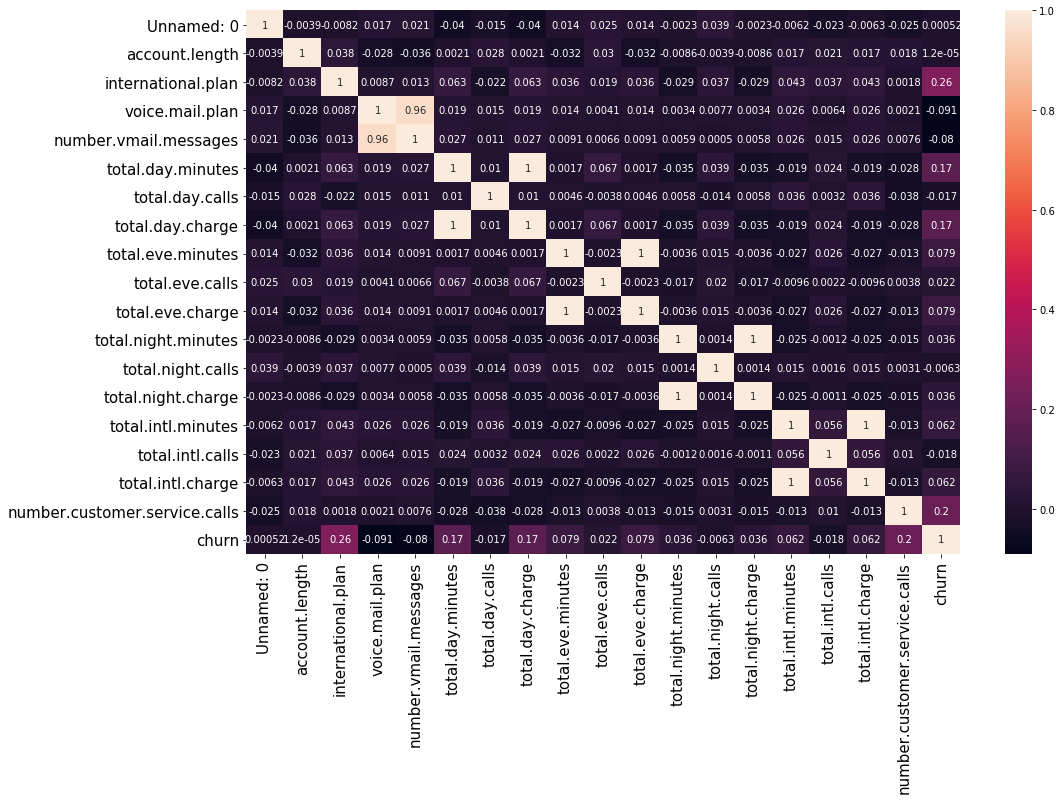

In [16]:
corr = df.corr()
plt.figure(figsize=(16,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
sns.heatmap(corr,annot=True)
#sns.title('Heatmap of Feature Correlations', fontsize = 20)

In [12]:
churn_corr = pd.DataFrame(corr['churn'].drop('churn'))
churn_corr.sort_values(by = 'churn', ascending = False) # moving our target value to the left for ease of analysis

38.4


NameError: name 'corr' is not defined

In [8]:
x = df.drop(columns = ['churn'], axis=1)
y = df['churn']   

## 2. Split train and test data set 
* To avoid over-fitting, we will divide our dataset into training and test splits.
   The training data will be used to train the logistic regression and the test data will be used to evaluate 
   the performance of the neural network. 
   
* This helps with the problem of over-fitting because we're evaluating our log. reg. on data that it has not seen (i.e. been 
  trained on) before.

In [11]:
from sklearn.model_selection import train_test_split
inpfeat_train,inpfeat_test,label_train,label_test = train_test_split(x,y,test_size=0.35,random_state=42)

# random_state: If you use random_state = some_number, then you can guarantee that your split will
# be always the same. This is useful if you want reproducible results, for example in testing for consistency 
# in the documentation (so that everybody can see the same numbers).

# Fit the Logistic Regression Model

In [12]:
# n_jobs = -1 , use all cores
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
log = LogisticRegression()
log.fit(inpfeat_train,label_train) 
# In R, glm(dependent variable y ~ . , data=train, family='binomial')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
y_pred_class = log.predict(inpfeat_test).astype(float) # in R, predict(fit, newdata=test) , predict(log,newdata=inpfeat_test,type='response')
y_pred_class
#print (inpfeat_test.shape)
#print (df.shape)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
y_pred_prob = log.predict_proba(inpfeat_test)
print (y_pred_prob[0:4])
y_pred_prob = log.predict_proba(inpfeat_test)[:,1]
print (y_pred_prob[0:4])

[[0.93477486 0.06522514]
 [0.95357105 0.04642895]
 [0.95080552 0.04919448]
 [0.87892948 0.12107052]]
[0.06522514 0.04642895 0.04919448 0.12107052]


In [23]:
loss = log_loss(label_test, y_pred_prob)
print ('Log loss is ', loss)
print ('Log loss / Cross Entnopy = {:4f}'.format(loss))

# 1/n   yi log(yi) + (1-yi) log(1-yi)
'''
yi = 1 , pi = 1 
yi = 0, pi is low 
yi = 1, pi is low  
yi = 0, pi is high    
'''

Log loss is  0.31817439852147106
Log loss / Cross Entnopy = 0.318174


'\nyi = 1 , pi = 1 \nyi = 0, pi is low \nyi = 1, pi is low  \nyi = 0, pi is high    \n'

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(label_test,log.predict(inpfeat_test).astype(int))

0.8717391304347826

In [25]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(label_test,log.predict(inpfeat_test))
confusion = confusion_matrix(label_test,y_pred_class)
print(confusion)

[[394   7]
 [ 52   7]]


In [26]:
print (label_test.value_counts())
print (7/59)  # 52 is FN

0    401
1     59
Name: churn, dtype: int64
0.11864406779661017


In [27]:
from sklearn.metrics import precision_score
# Sensitivity
TP= confusion[1,1]
print('True Positive' , TP)
TN=confusion[0,0]
print('True Negative',TN)
FP=confusion[0,1]
print ('False Positive', FP)
FN=confusion[1,0]
print ('False Negative',FN)
print ("\n")
print ("Accuracy ", (TP+TN)/(TP+TN+FP+FN))
print ("\n")
print ("TPR/Sensitivity/Recall ", TP/(TP+FN)) # When the actual value is +ve, how often is the prediction correct ? 
print ("\n")
print ("Sepcificity ", TN/ float(TN+FP)) # When the actual value is -ve, how often is the prediction correct ?  Specificity
print ("\n")
print ("Precision ", TP/(TP+FP))   # when a postive value is predicted, how often is the prediction correct ?
print ("Precision score", precision_score(label_test,y_pred_class))  # Churn is the positive class

True Positive 7
True Negative 394
False Positive 7
False Negative 52


Accuracy  0.8717391304347826


TPR/Sensitivity/Recall  0.11864406779661017


Sepcificity  0.9825436408977556


Precision  0.5
Precision score 0.5


In [28]:
from sklearn.metrics import classification_report
print(classification_report(label_test,y_pred_class)) 
# Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       401
          1       0.50      0.12      0.19        59

avg / total       0.83      0.87      0.84       460

